In [1]:
import pandas as p
import numpy as np
import matplotlib.pyplot as pt
import sklearn 
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
import seaborn as s

In [2]:
d = p.read_csv('amazon_baby.csv')

In [3]:
d.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [4]:
d.tail()

,name,review,rating
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5
183530,Best 2 Pack Baby Car Shade for Kids - Window S...,I love this product very mush . I have bought ...,5


In [5]:
d.shape

(183531, 3)

In [6]:
d.size

550593

In [7]:
d.count()

name      183213
review    182702
rating    183531
dtype: int64

In [8]:
d.value_counts()

name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              review                                                                                                                                                                                                

In [9]:
d.describe()

,rating
count,183531.000000
mean,4.120448
std,1.285017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
d.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [12]:
d.isna().any()

name       True
review     True
rating    False
dtype: bool

In [13]:
d = d.dropna()

In [14]:
np.random.seed(34)

In [15]:
d1 = d.sample(frac = 0.34)

In [16]:
d1['Sentiments'] = d1.rating.apply(lambda i: 0 if i in [1, 2] else 1)

In [17]:
W = d1['review']
Z = d1['Sentiments']

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(W, Z, 
                                        test_size = 0.4, random_state=42)

In [19]:
vc = CountVectorizer()

In [20]:
vttdm = vc.fit_transform(Xtrain)
Xtest_dtm = vc.transform(Xtest)

In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(vttdm, Ytrain)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
LR_score=LR.score(Xtest_dtm,Ytest)

In [23]:
print("Logistic Regression:")
LR_score

Logistic Regression:


0.9053416649868978

In [24]:
Y_predict=LR.predict(Xtest_dtm)

In [25]:
Y_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [26]:
cm=confusion_matrix(Ytest,Y_predict)

In [27]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])


In [28]:
cm_display
pt.show(cm_display)

In [29]:
tn, fp, fn, tp = confusion_matrix(Ytest, Y_predict).ravel()
print(tn, fp, fn, tp)

2058 1531 817 20399


Text(0.5, 1.0, 'Ratings')

<Figure size 1000x1000 with 0 Axes>

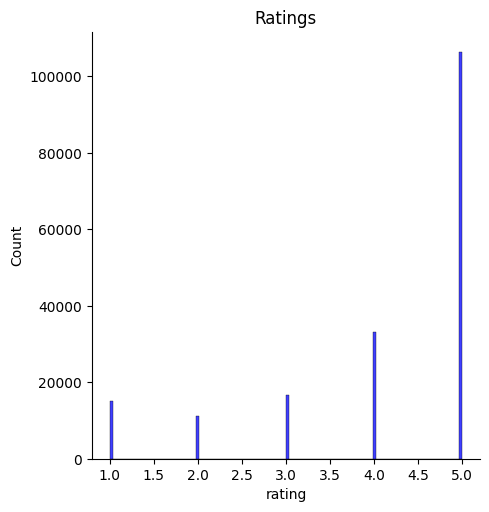

In [30]:
pt.figure(figsize=(10,10))
s.displot(d['rating'],color='blue')
pt.title("Ratings")

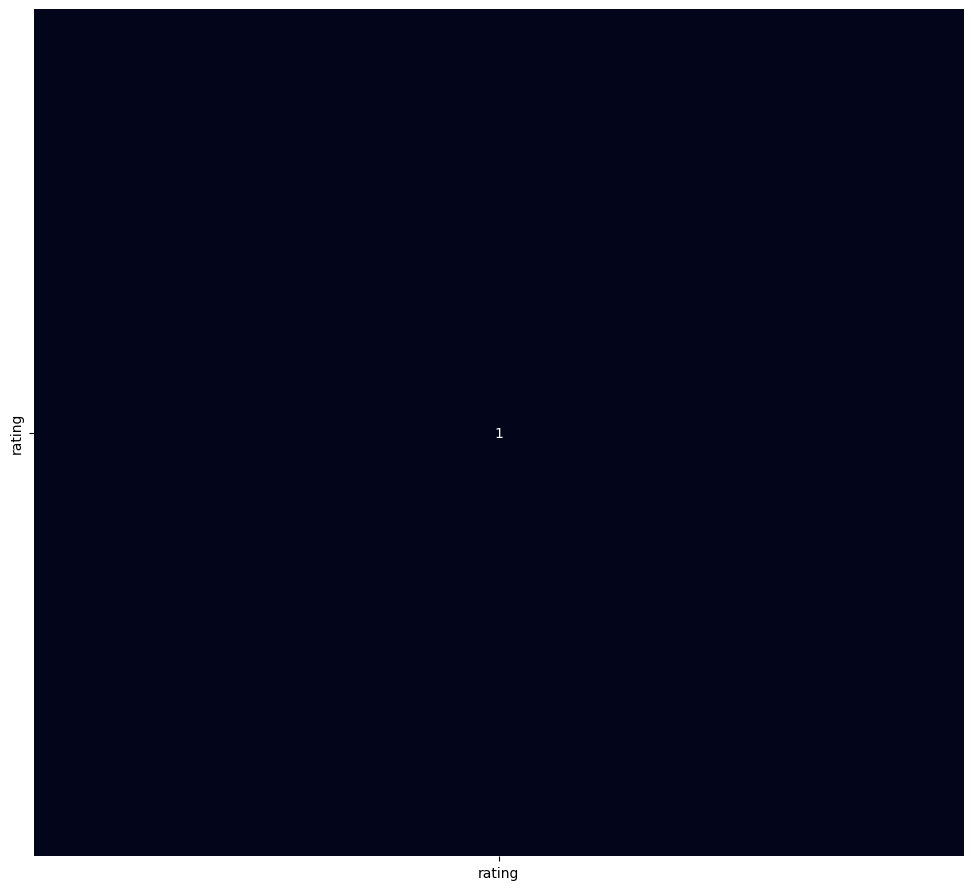

In [31]:
pt.figure(figsize=(12,11))
s.heatmap(d.corr(), annot=True, cbar= False)
pt.show()

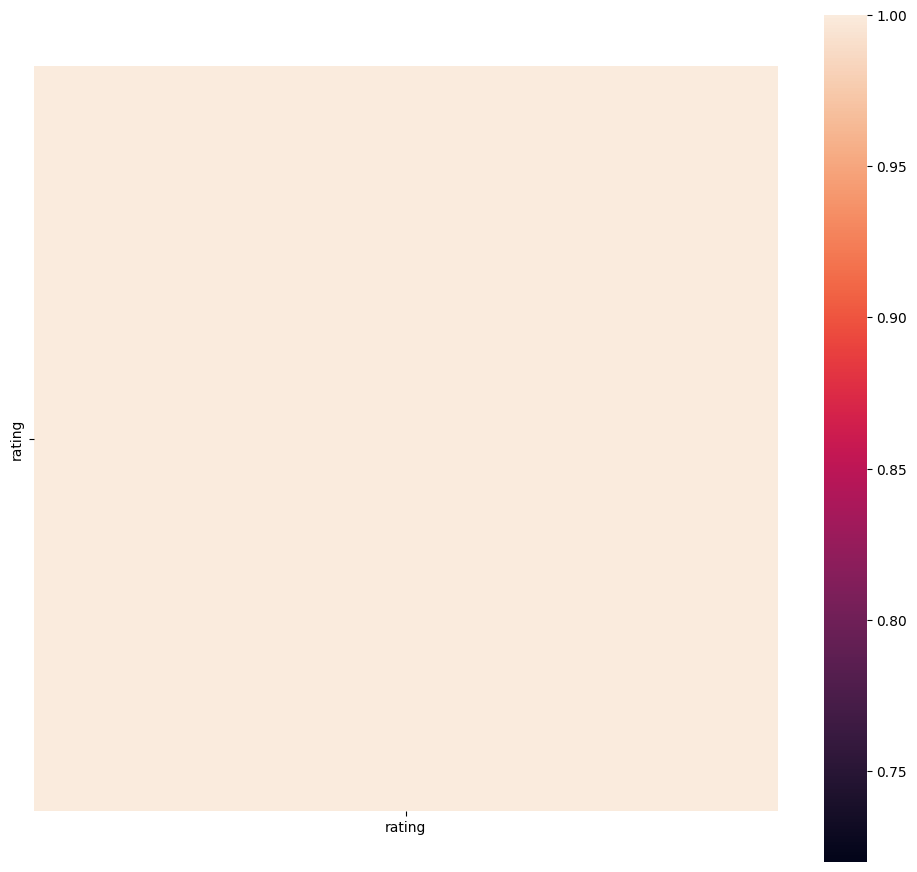

In [33]:
pt.figure(figsize=(12,11))
s.heatmap(d.corr(), vmax = .8, square = True)
pt.show()

<AxesSubplot: xlabel='rating', ylabel='count'>

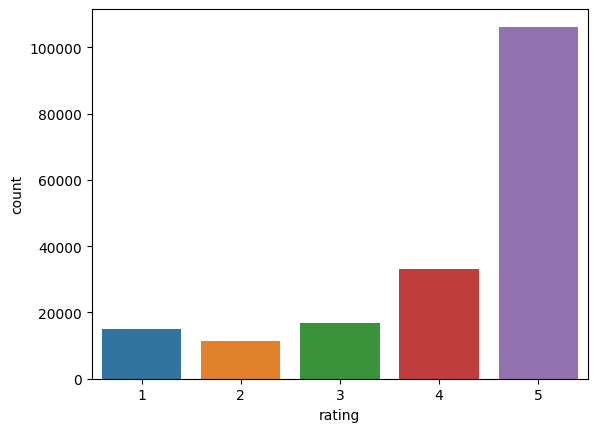

In [34]:
s.countplot(x='rating',data=d)

<AxesSubplot: >

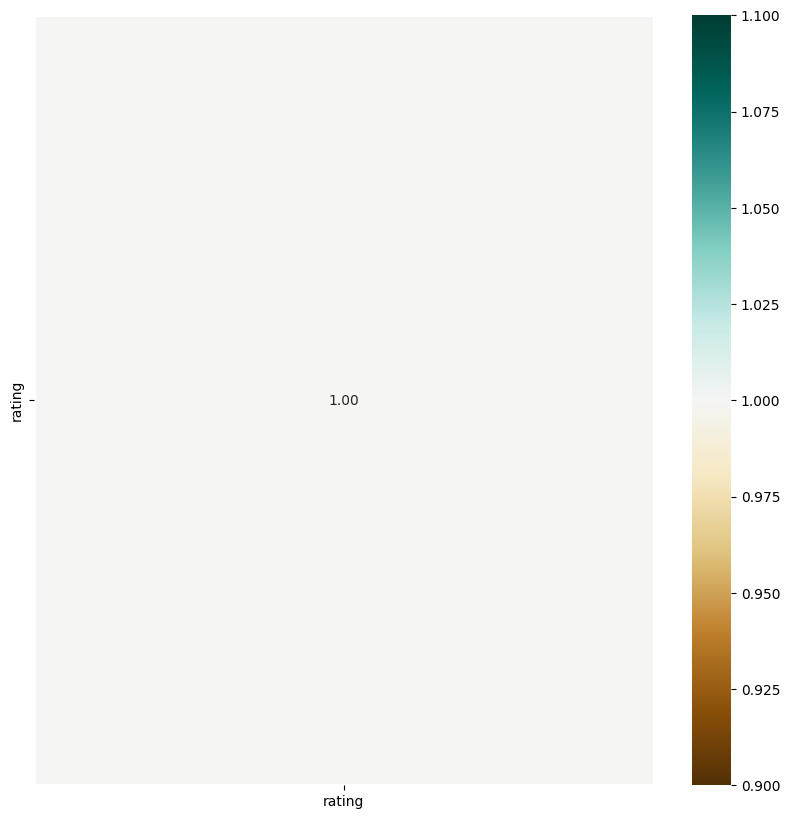

In [35]:
pt.figure(figsize=(10,10))
s.heatmap(d.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

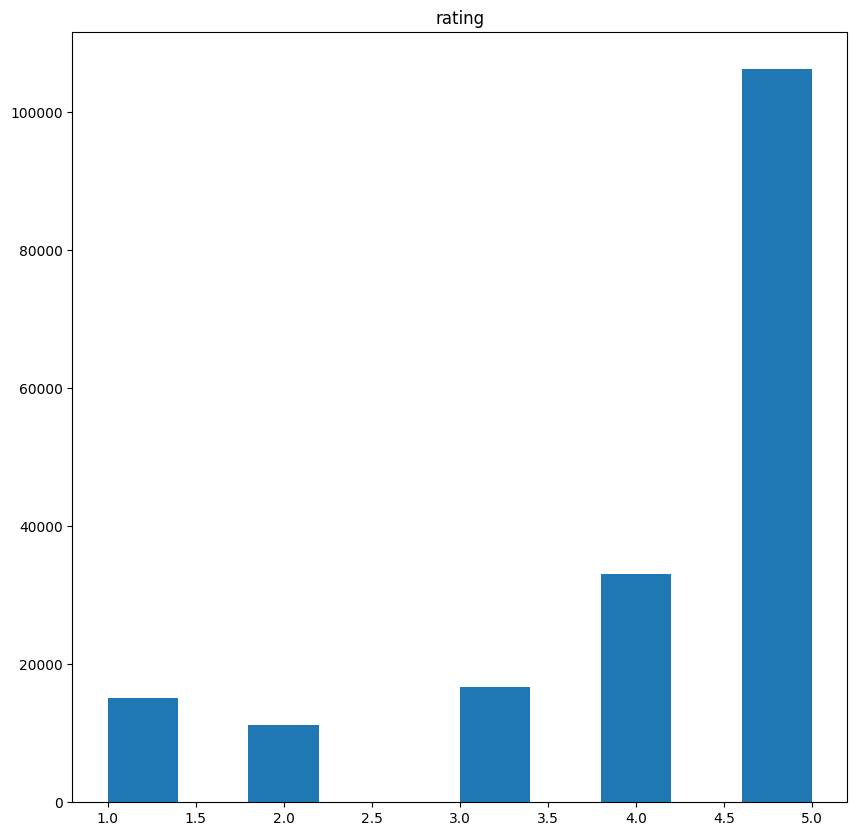

In [36]:
d.hist(grid=False,bins=10,figsize=(10,10))
pt.show()